In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import scipy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("drive/MyDrive/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    print(col,'number of unique values is :',df[col].nunique())
    print('value counts is :',df[col].value_counts())
    print('---------------------------')

Pregnancies number of unique values is : 17
value counts is : Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
---------------------------
Glucose number of unique values is : 136
value counts is : Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
---------------------------
BloodPressure number of unique values is : 47
value counts is : BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2


Text(0.5, 1.0, 'Correlation Matrix')

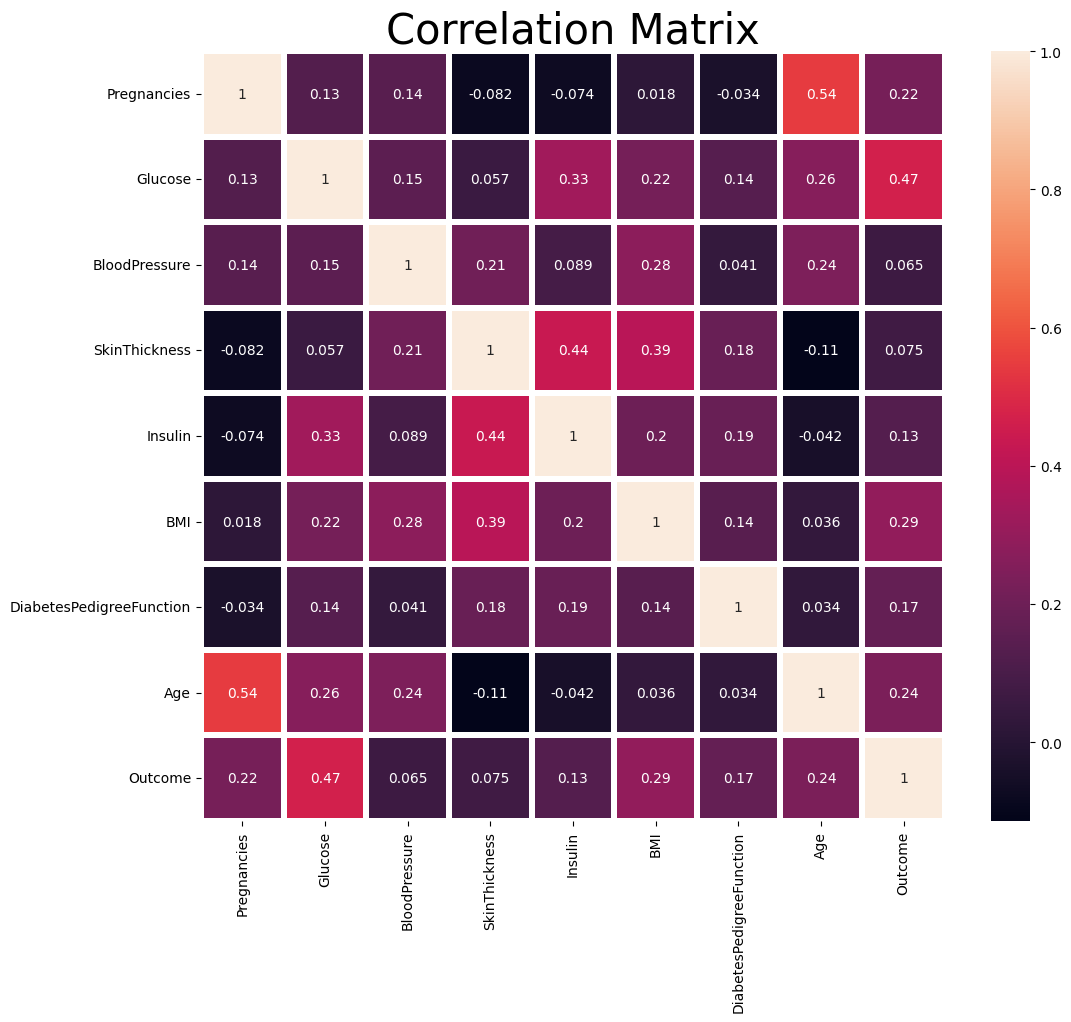

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',linewidths=4)
plt.title('Correlation Matrix',fontsize=30)

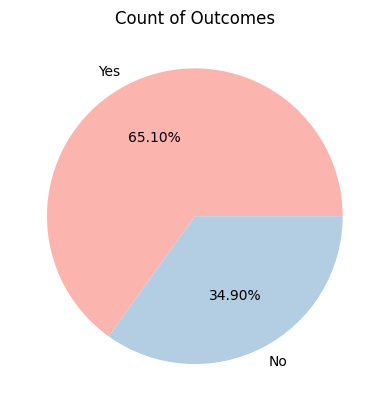

In [ ]:
exp_vals = df['Outcome'].value_counts()
exp_labels = ['Yes','No']
plt.pie(exp_vals,labels=exp_labels, autopct='%1.2f%%', colors=plt.cm.Pastel1.colors)
plt.title('Count of Outcomes')
plt.show()

<Axes: title={'center': 'boxplot'}, ylabel='Pregnancies'>

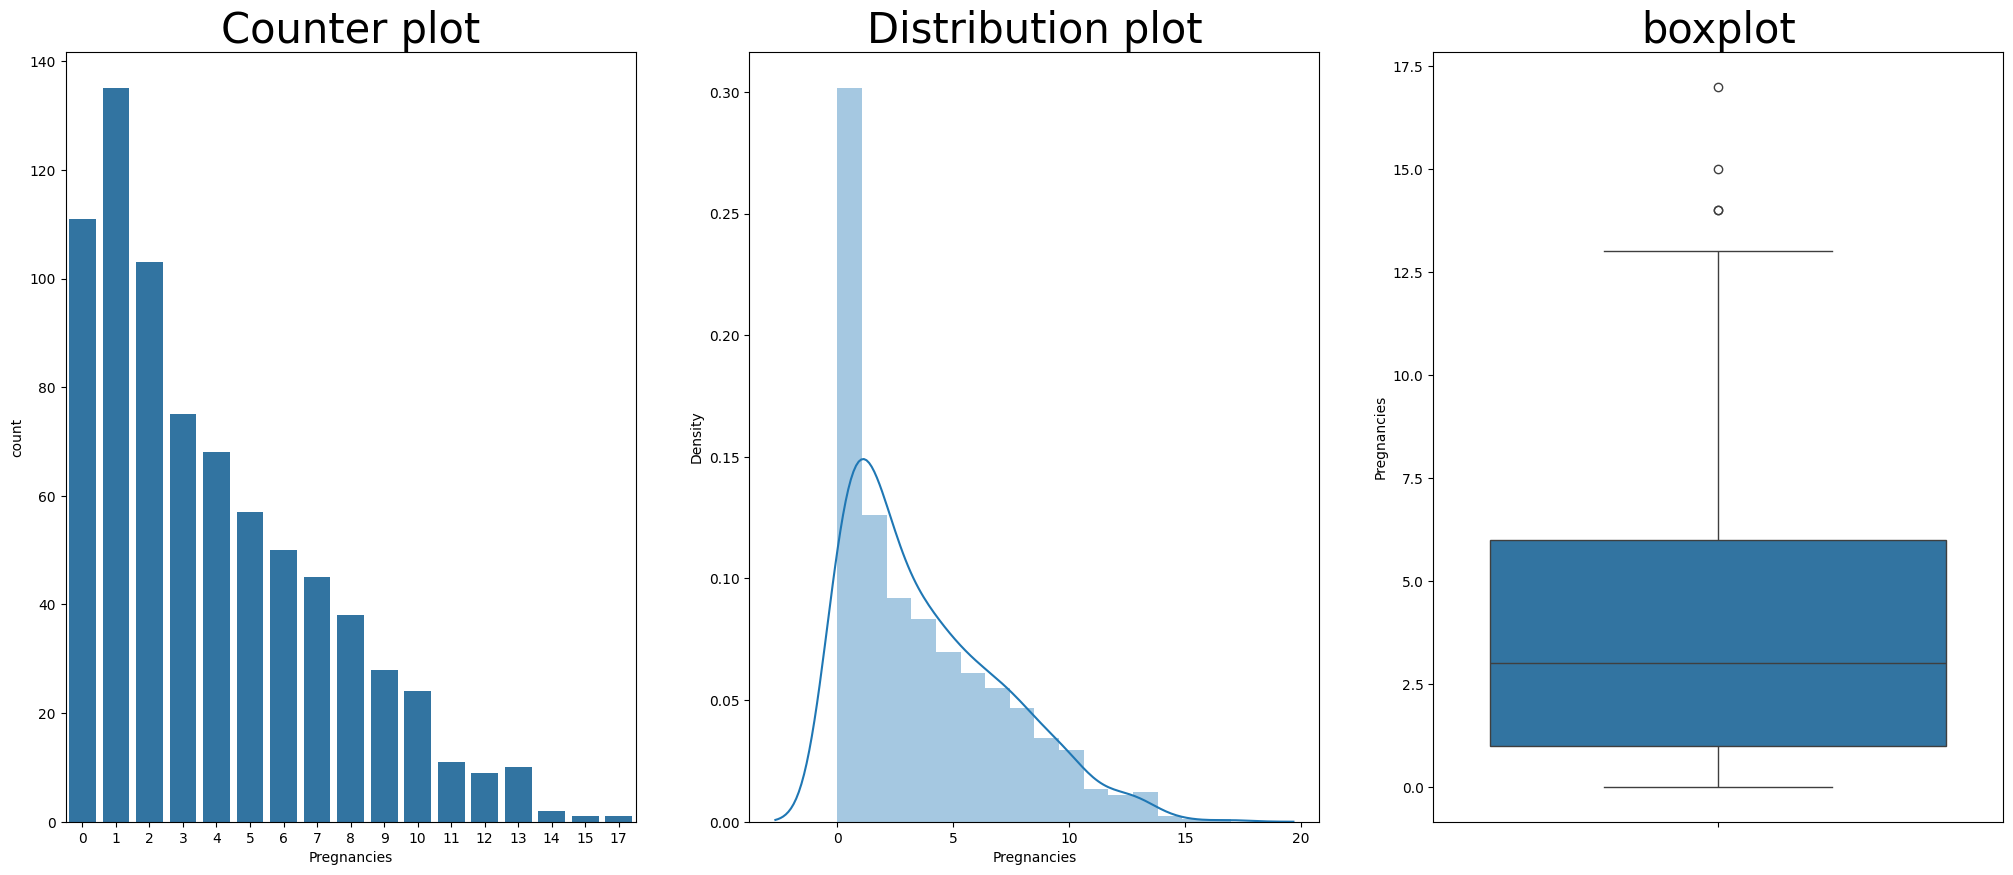

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.title('Counter plot',fontsize=30)
sns.countplot(x='Pregnancies',data=df)
plt.subplot(1,3,2)
plt.title('Distribution plot',fontsize=30)
sns.distplot(df.Pregnancies)
plt.subplot(1,3,3)
plt.title('boxplot',fontsize=30)
sns.boxplot(y=df.Pregnancies)

Text(0.5, 1.0, 'Average of age by outcomes ')

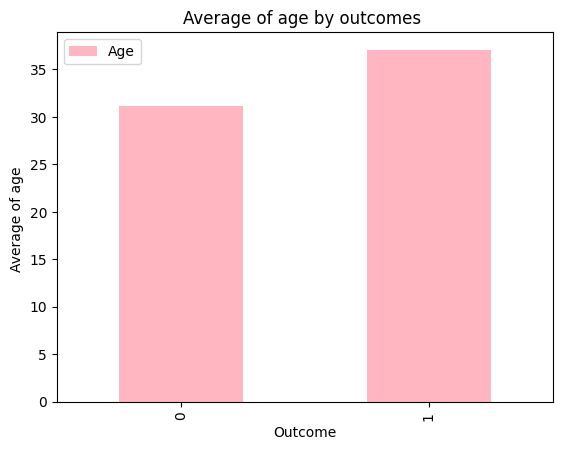

In [ ]:
age_gr = df.groupby('Outcome')['Age'].mean()
age_gr
pd.DataFrame(age_gr).plot.bar(color='lightpink')
plt.ylabel('Average of age ')
plt.title('Average of age by outcomes ')

Text(0.5, 1.0, 'Distribution of age ')

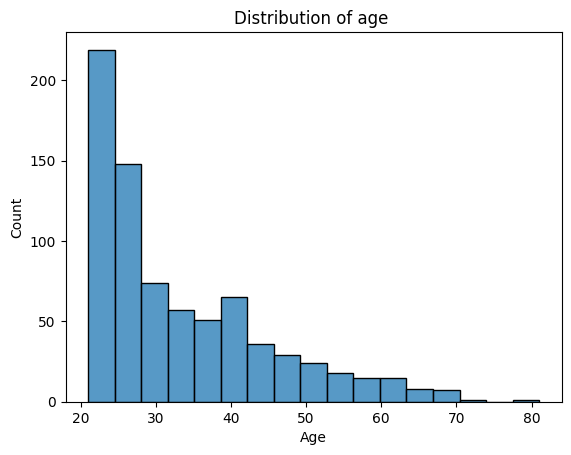

In [ ]:
sns.histplot(x='Age',data=df)
plt.title('Distribution of age ')

<Axes: xlabel='Outcome'>

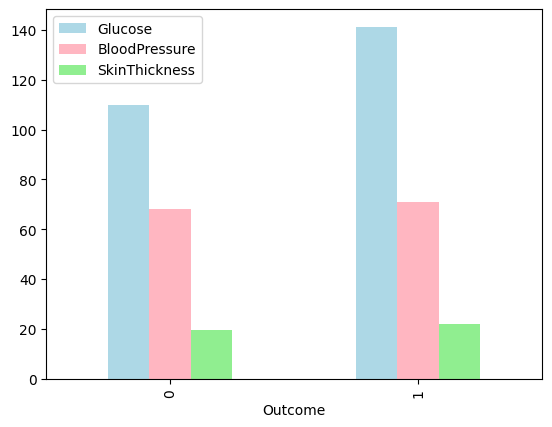

In [ ]:
outcome_group=df.groupby('Outcome')[['Glucose', 'BloodPressure', 'SkinThickness']].mean()
outcome_group.plot.bar(color=['lightblue','lightpink','lightgreen'])

<Axes: >

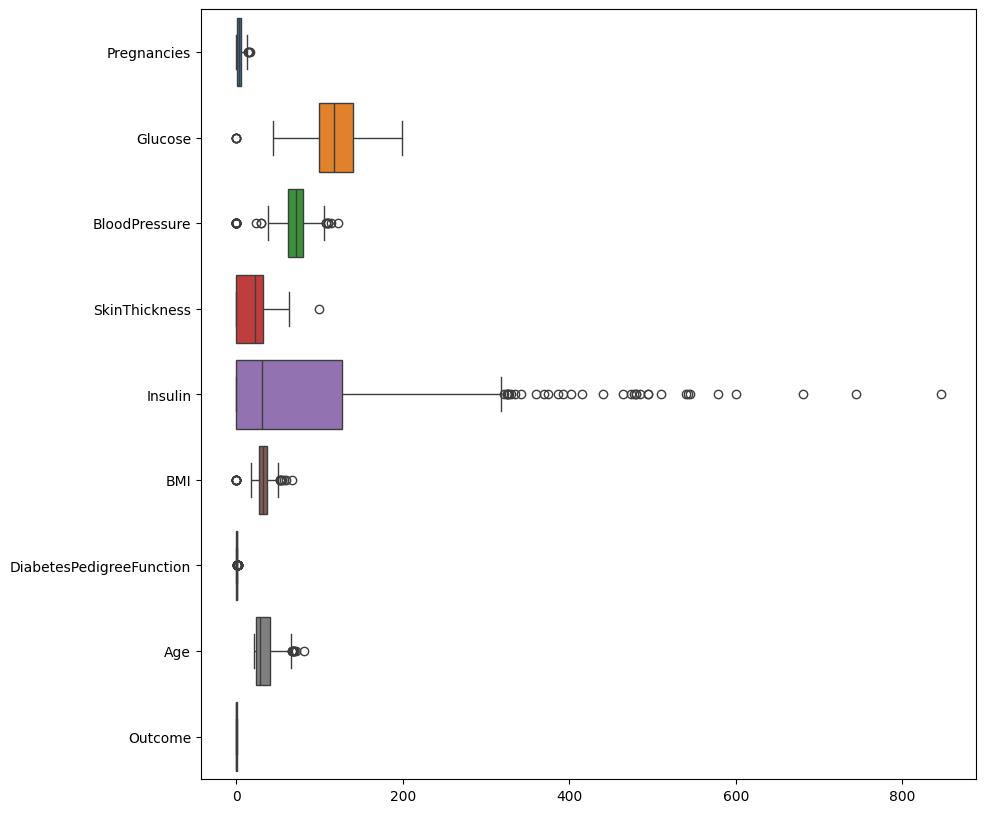

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(df,orient='h')

Handle outliers

In [ ]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr
            a = data[column] < low_b
            b = data[column] > high_b
            data[column] = np.where(a, low_b, np.where(b, high_b, data[column]))
            if (data[column] < low_b).any() or (data[column] > high_b).any():
                print(column, ": has outliers")
            else:
                print(column, ": no outliers")
    return data
num_col = df.select_dtypes(include='number').columns
for col in num_col:
    df = handle_outliers(df, [col])

Pregnancies : no outliers
Glucose : no outliers
BloodPressure : no outliers
SkinThickness : no outliers
Insulin : no outliers
BMI : no outliers
DiabetesPedigreeFunction : no outliers
Age : no outliers
Outcome : no outliers


Split features and target data

In [ ]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

Scale the data

In [ ]:
scale=StandardScaler()
x_scale=scale.fit_transform(x)

Split train and target data

In [ ]:
x_train , x_test ,y_train ,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=0)

Build model

In [ ]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
svc=SVC()

In [ ]:
columns=['LogisticRegression','RandomForestClassifier','SVC']
train_score=[]
test_score=[]
rec_score=[]
f_score=[]

In [ ]:
def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_test=accuracy_score(y_pred,y_test)*100
    accuracy_train=model.score(x_train,y_train)*100
    recall_result=recall_score(y_pred,y_test)*100
    f1_result=f1_score(y_pred,y_test)*100

    test_score.append(accuracy_test)
    train_score.append(accuracy_train)
    rec_score.append(recall_result)
    f_score.append(f1_result)

    print('Accuracy after train the model is :',accuracy_train)
    print('Accuracy after test the model is :',accuracy_test)
    print('Result recall score is :',recall_result)
    print('Result F1 score is :',f1_result)

In [ ]:
print("Logistic Regression")
all(log_reg)

Logistic Regression
Accuracy after train the model is : 76.2214983713355
Accuracy after test the model is : 81.81818181818183
Result recall score is : 74.35897435897436
Result F1 score is : 67.44186046511628


In [ ]:
print("Random Forest Classifier")
all(rf_clf)

RF CLF
Accuracy after train the model is : 100.0
Accuracy after test the model is : 80.51948051948052
Result recall score is : 69.76744186046511
Result F1 score is : 66.66666666666666


In [ ]:
print("Support Vector Classifier")
all(svc)

Support Vector Classifier
Accuracy after train the model is : 82.24755700325733
Accuracy after test the model is : 80.51948051948052
Result recall score is : 71.7948717948718
Result F1 score is : 65.11627906976743


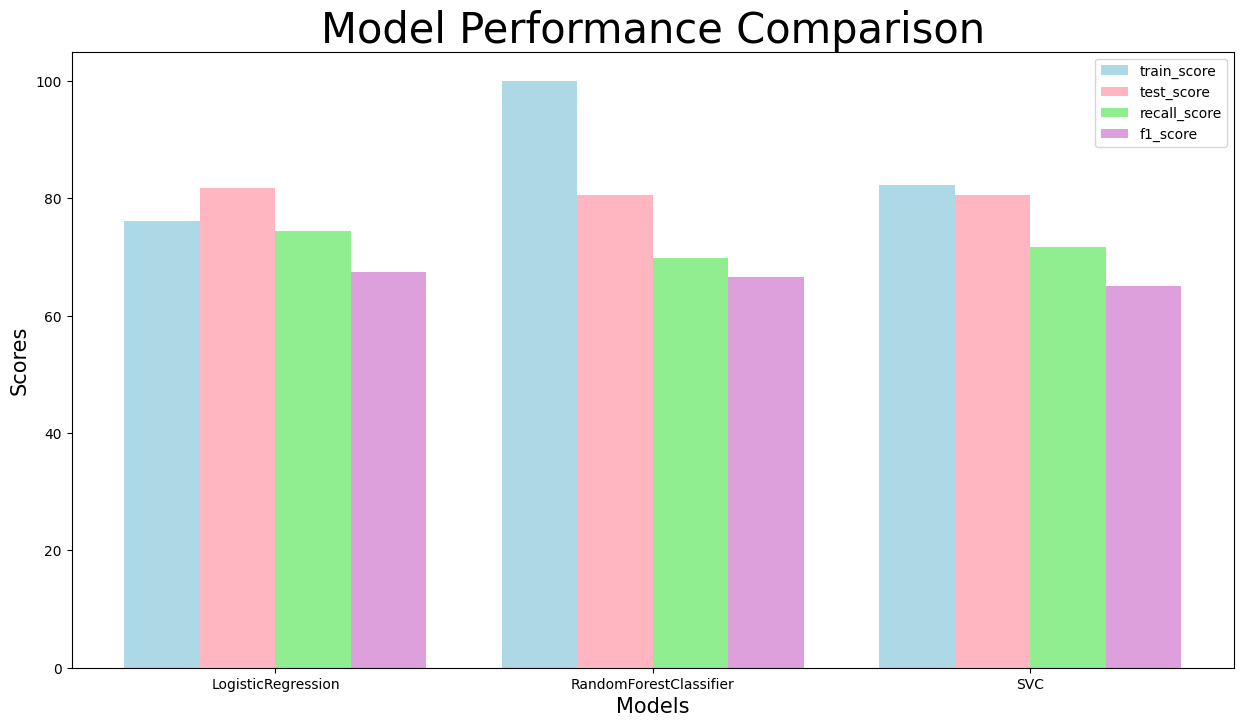

In [ ]:
plt.figure(figsize=(15, 8))
bar_width = 0.2
xpos=np.arange(len(columns))
bars1=plt.bar(xpos - 0.3, train_score, width=bar_width, label="train_score",color='lightblue')
bars2=plt.bar(xpos - 0.1, test_score, width=bar_width, label="test_score",color='lightpink')
bars3=bars=plt.bar(xpos + 0.1, rec_score, width=bar_width, label="recall_score",color='lightgreen')
bars4=plt.bar(xpos + 0.3, f_score, width=bar_width, label="f1_score",color='plum')

plt.xticks(xpos, columns)
plt.legend()
plt.xlabel("Models",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Model Performance Comparison",fontsize=30)
plt.show()

Feature Importances Extraction

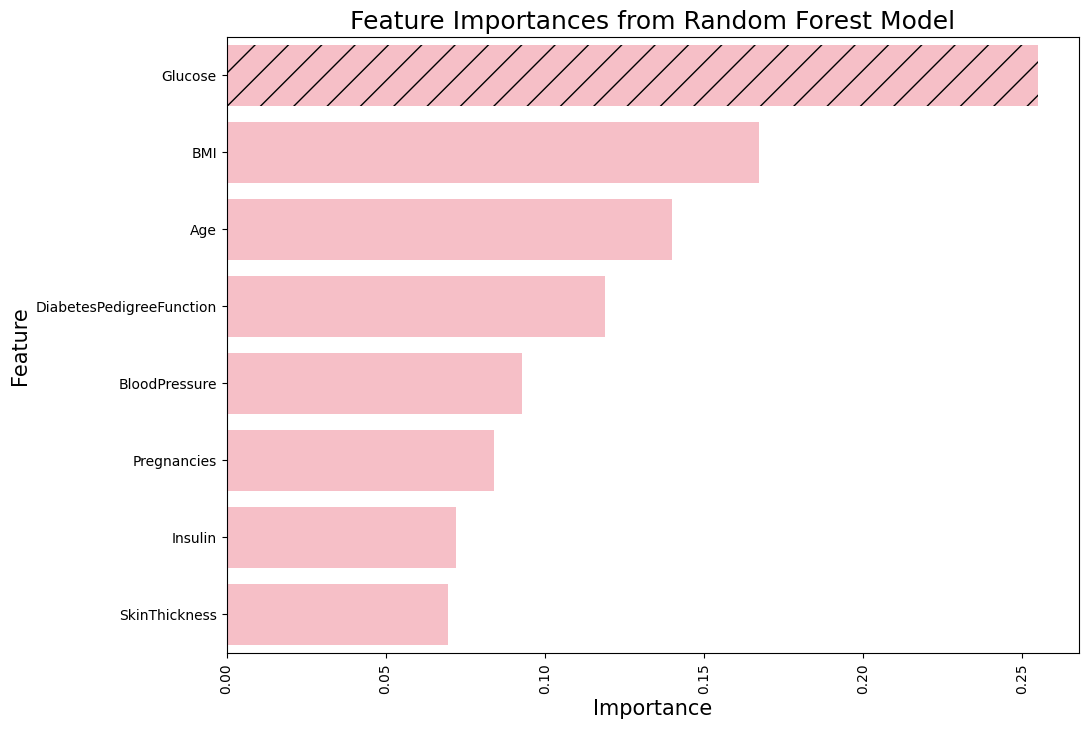

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x,y)
feature_importances = rf_clf.feature_importances_

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})
plt.figure(figsize=(11, 8))

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
bars=sns.barplot(x='Importance',y='Feature',data=feature_importances_df,color='lightpink')
bars.patches[0].set_hatch('/')
plt.ylabel('Feature',fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.title('Feature Importances from Random Forest Model',fontsize=18)
plt.xticks(rotation=90)
plt.show()

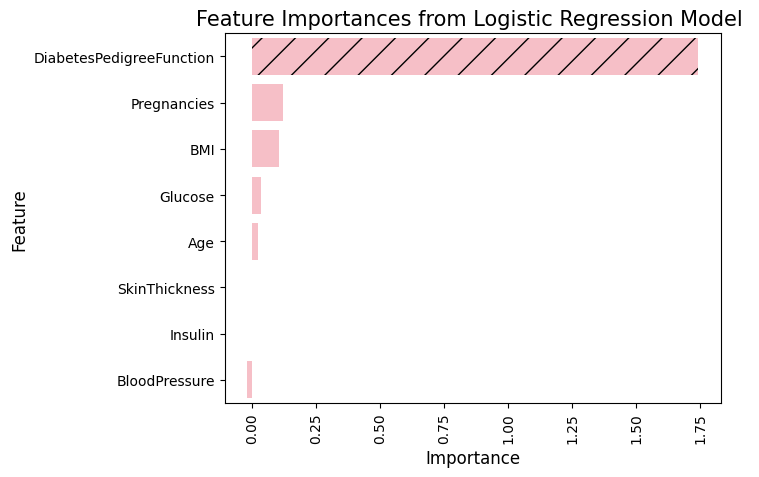

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x,y)
coefficients = log_reg.coef_[0]
# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': coefficients
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
bars=sns.barplot(x='Importance',y='Feature',data=feature_importances_df,color='lightpink')
bars.patches[0].set_hatch('/')
plt.ylabel('Feature',fontsize=12)
plt.xlabel('Importance',fontsize=12)
plt.title('Feature Importances from Logistic Regression Model ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

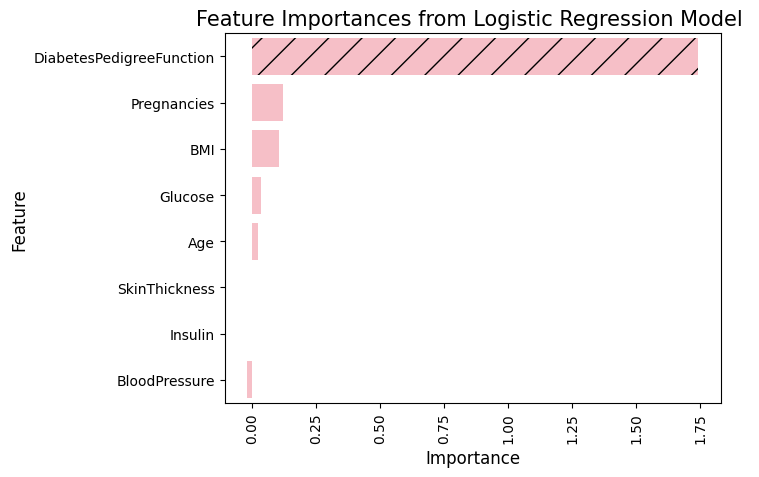

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x,y)
coefficients = log_reg.coef_[0]
# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': coefficients
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
bars=sns.barplot(x='Importance',y='Feature',data=feature_importances_df,color='lightpink')
bars.patches[0].set_hatch('/')
plt.ylabel('Feature',fontsize=12)
plt.xlabel('Importance',fontsize=12)
plt.title('Feature Importances from Logistic Regression Model ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Model Evaluation

In [ ]:
def cm(model):
    y_pred=model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    print(model)
    plt.show()

LogisticRegression()


<Figure size 800x600 with 0 Axes>

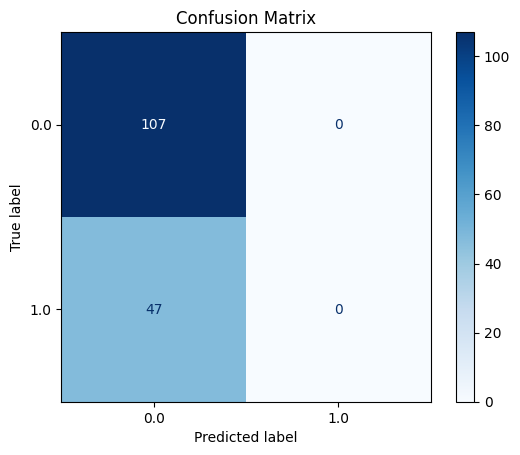

In [ ]:
cm(log_reg)